# Objective

This notebook shows the spot images and parameters generated for Figure 2b and ready for worker annotations.
 -	background image: MAX_ISP_300_2.tif (tissue)
 -	spot density = [0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.014]
     -	correspond with avg NND from ~14 to 4.
 -	average SNR = [10]
 -	number of spots: desired = 150, tolerance = 40

In [1]:
import sys
sys.path.insert(0, '../../../FISH-annotation/SpotImage')
from SpotImage import SpotImage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree
from matplotlib.lines import Line2D
import math

"""
Instantiate the SpotImage.
"""

bg_img_filename = 'MAX_ISP_300_2.tif'
global_intensity_dial = 2.5   # raise the threshold found by Otsu's

### These parameters are the same for all images in this batch.

In [2]:
plot_spots = True
plot_img = True
save_spots = True
save_img = True

num_spots_tol = 40
num_spots = 150

snr_sigma = 2.5
snr_threshold = 3

### These parameters vary.

In [3]:
snr_mu_list = [10]
density_list = [0.010, 0.012, 0.014]

### Generate spot images.

195
195
195


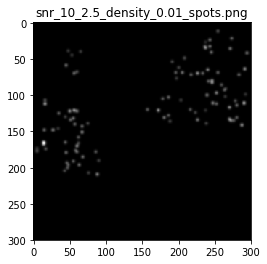

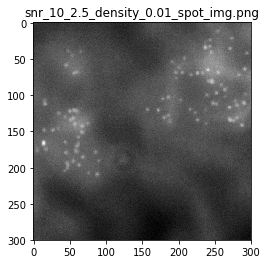

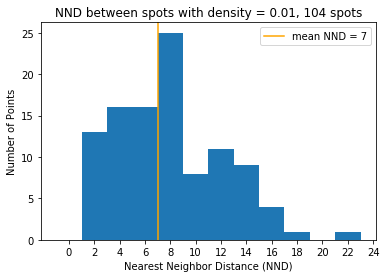

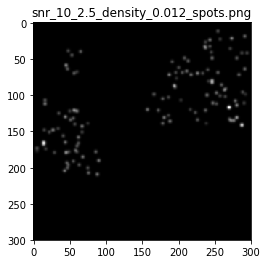

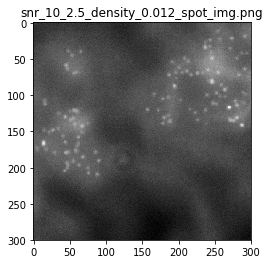

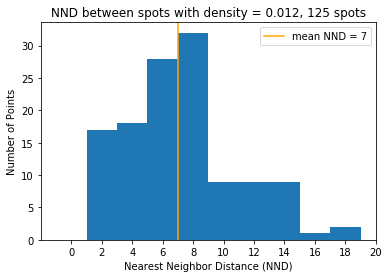

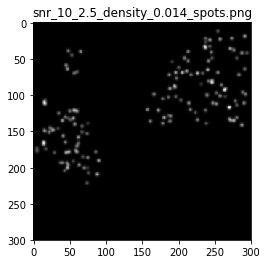

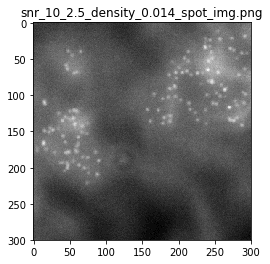

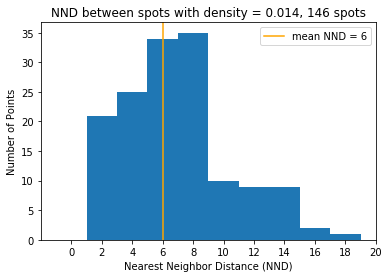

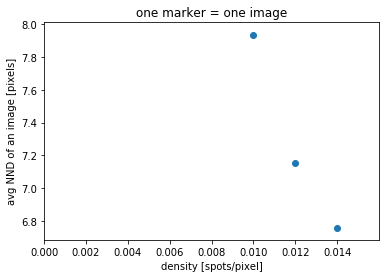

In [4]:
densities = []
mean_NNDs = []
si = SpotImage(num_spots_desired=num_spots, num_spots_tol=num_spots_tol, bg_img_filename = bg_img_filename, global_intensity_dial = global_intensity_dial)
for snr_mu in snr_mu_list:
    snr_distr_params = ['Gauss', snr_mu, snr_sigma]
    for density in density_list:
        name = 'snr_' + str(snr_mu) + '_' + str(snr_sigma) + '_density_' + str(density)
        spots_filename = name + '_spots.png'
        spot_img_filename = name + '_spot_img.png'
        csv_filename = name + '_coord_snr_list.csv'
        si.generate_spot_image(num_spots = num_spots, snr_distr_params = snr_distr_params, snr_threshold = snr_threshold, plot_spots=plot_spots, plot_img=True, save_spots=True, save_img=True, spots_filename = spots_filename, spot_img_filename = spot_img_filename, density = density)
        si.plot_spot_nnd()
        si.get_coord_snr_list_csv(csv_filename)
        densities.append(density)
        mean_NNDs.append(si.get_spot_nnd())
            
plt.scatter([densities], [mean_NNDs])
plt.xlabel('density [spots/pixel]')
plt.ylabel('avg NND of an image [pixels]')
plt.xlim(0, max(density_list)+0.002)
plt.xticks(np.arange(0,max(density_list)+0.002,0.002))
plt.title('one marker = one image')
plt.show()